In [1]:
import numpy as np
import sklearn.linear_model as skl
import matplotlib.pylab as py
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
model = skl.LinearRegression()


## Very Simple data 

In [3]:
xval = np.array([1,2,3,4,5]).reshape(-1,1)

In [4]:
xval

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
yval = np.array([11,12,13,14,15])

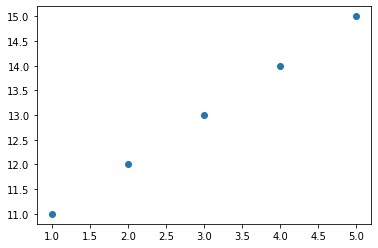

In [6]:
py.scatter(xval,yval)

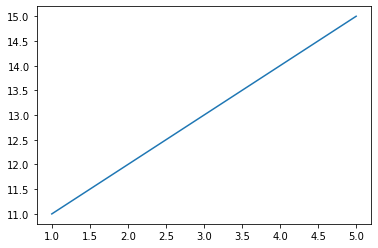

In [7]:
py.plot(xval,yval)

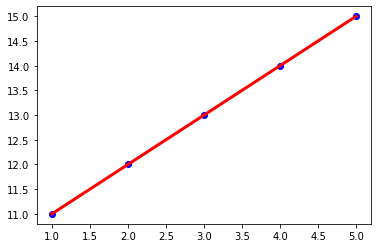

In [8]:
import pandas
d = pd.DataFrame({'xval':[1,2,3,4,5], 'yval':[11,12,13,14,15]})
mymodel = np.poly1d(np.polyfit(d['xval'], d['yval'], 1))
myline = np.linspace(d['xval'].min(), d['xval'].max(), 100)
plt.scatter(d['xval'], d['yval'], color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

In [9]:
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.predict(np.array([12]).reshape(-1,1))

array([22.])

In [11]:
model.predict(np.array([44]).reshape(-1,1))

array([54.])

In [12]:
model.score(xval,yval)

1.0

In [13]:
model.coef_

array([1.])

In [14]:
model.intercept_

10.0

## Add some errors

In [15]:
xval = np.array([1,2,3,3,4,3,6,8,9,10]).reshape(-1,1)
yval = np.array([1,2,3,4,5,6,7,7,9,10])
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

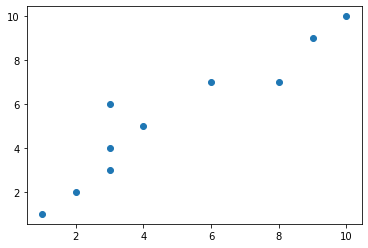

In [16]:
py.scatter(xval,yval)

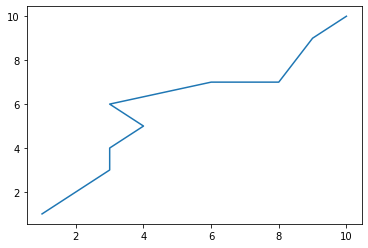

In [17]:
py.plot(xval,yval)

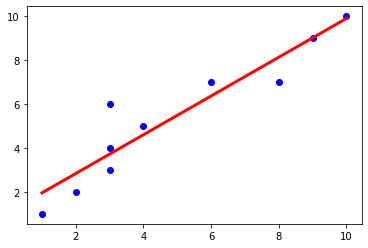

In [18]:
import pandas
d = pd.DataFrame({'xval':[1,2,3,3,4,3,6,8,9,10], 'yval':[1,2,3,4,5,6,7,7,9,10]})
mymodel = np.poly1d(np.polyfit(d['xval'], d['yval'], 1))
myline = np.linspace(d['xval'].min(), d['xval'].max(), 100)
plt.scatter(d['xval'], d['yval'], color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

In [19]:
model.predict(np.array([6]).reshape(-1,1))

array([6.37007874])

In [20]:
model.predict(np.array([44]).reshape(-1,1))

array([39.88188976])

In [21]:
model.score(xval,yval)

0.8818897637795275

In [22]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples. For some estimators this may be a
        precomputed kernel matrix instead, shape = (n_samples,
        n_samples_fitted], where n_samples_fitted is the number of
        samples used in the fitting for the estimator.
    
    y : arra

In [23]:
model.coef_

array([0.88188976])

In [24]:
model.intercept_

1.0787401574803157

## metrics

In [25]:
y_pred = model.predict(xval)

In [26]:
y_pred

array([1.96062992, 2.84251969, 3.72440945, 3.72440945, 4.60629921,
       3.72440945, 6.37007874, 8.13385827, 9.01574803, 9.8976378 ])

In [27]:
u = ((yval - y_pred) ** 2).sum()  
v = ((yval - yval.mean()) ** 2).sum()

In [28]:
1 - u/v

0.8818897637795275

In [29]:
model.score(xval,yval)

0.8818897637795275

In [30]:
import sklearn.metrics as skm

In [31]:
skm.r2_score(yval,y_pred)

0.8818897637795275

# more dimensions

In [32]:
samp=np.array([[1,2,300,14],
               [9,3,1,95],
               [5,7,11,58],
               [4,8,14,57],
               [2,1,2,27],
               [9,9,7,100],
               [12,3,21,126],
               [29,12,3,309],
               [2,40,11,90],
               [21,32,4,270],
               [7,13,8,79],
               [17,2,19,172],
               [13,24,13,159]])
df=pd.DataFrame(samp, columns=['X','Y','Z','W'])

In [33]:
df

,X,Y,Z,W
0,1,2,300,14
1,9,3,1,95
2,5,7,11,58
3,4,8,14,57
4,2,1,2,27
5,9,9,7,100
6,12,3,21,126
7,29,12,3,309
8,2,40,11,90
9,21,32,4,270


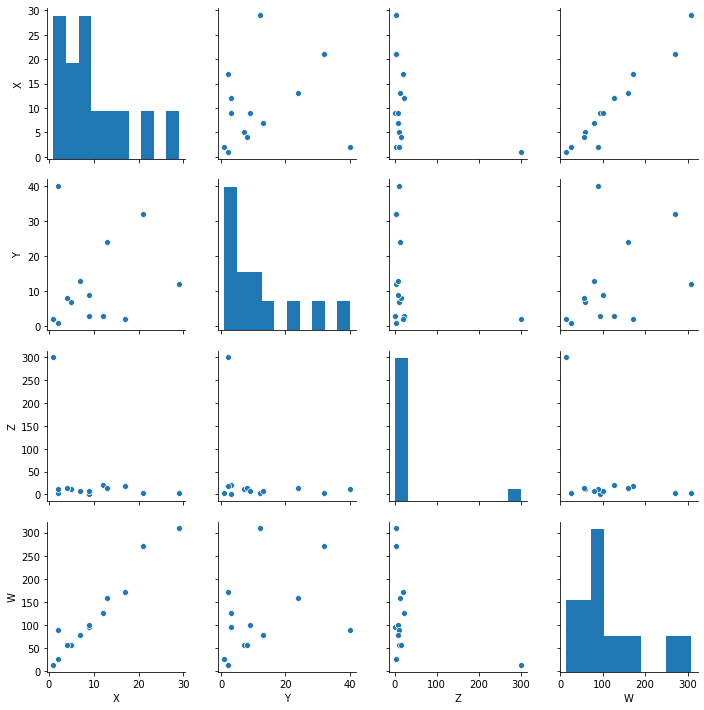

In [34]:
sb.pairplot(df)

In [35]:
xval=df[:8][['X','Y','Z']]

In [36]:
yval=df[:8][['W']]

In [37]:
xval

,X,Y,Z
0,1,2,300
1,9,3,1
2,5,7,11
3,4,8,14
4,2,1,2
5,9,9,7
6,12,3,21
7,29,12,3


In [38]:
yval

,W
0,14
1,95
2,58
3,57
4,27
5,100
6,126
7,309


In [39]:
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model.intercept_

array([3.16629318])

In [41]:
model.coef_

array([[ 1.00253720e+01,  1.12411075e+00, -4.78200390e-03]])

In [42]:
pred=model.predict(df[8:][['X','Y','Z']])

In [43]:
pred

array([[ 68.12886489],
       [249.65152055],
       [ 87.91908068],
       [175.75498023],
       [160.41262073]])

In [44]:
df[8:]

,X,Y,Z,W
8,2,40,11,90
9,21,32,4,270
10,7,13,8,79
11,17,2,19,172
12,13,24,13,159


In [45]:
model.predict(np.array([23,5,8]).reshape(1,-1))

array([[239.33214637]])

In [46]:
df.corr()

,X,Y,Z,W
X,1.000000,0.145237,-0.334792,0.969594
Y,0.145237,1.000000,-0.247521,0.374054
Z,-0.334792,-0.247521,1.000000,-0.366937
W,0.969594,0.374054,-0.366937,1.000000


In [47]:
model.coef_

array([[ 1.00253720e+01,  1.12411075e+00, -4.78200390e-03]])

In [48]:
model.intercept_

array([3.16629318])

## deployment

In [49]:
23 * model.coef_[0,0] + 5 * model.coef_[0,1] + 40 * model.coef_[0,2] + model.intercept_[0] 

239.1791222491808